# I. Thông tin Dataset

## Ngữ cảnh:
Hiện nay với sự phát triển của ngành công nghiệp ô tô và sự phổ biến của ô tô trong đời sống, tiết kiệm nguyên liệu là một trong những tiêu chí quan trọng trong việc đánh giá một chiếc ô tô. Phân tích khả năng tiết kiệm nhiên liệu trong ngành công nghiệp ô tô mang lại nhiều lợi ích quan trọng, bao gồm:
- Giảm chi phí vận hành
- Bảo vệ môi trường
- Nâng cao tính cạnh tranh
- Phát triển công nghệ mới
- Đảm bảo an ninh năng lượng

Vì thế nên chúng em quyết định sẽ phân tích và đưa ra cái nhìn tổng quan chi tiết về khả năng tiết kiệm nhiên liệu trong ngành công nghiệp ô tô.
## Nguồn gốc
Dataset được lấy từ Kaggle (https://www.kaggle.com/datasets/tanishqdublish/vehcile-fuel-consumption/data)

## Nội dung
Bộ dữ liệu này cung cấp cái nhìn tổng quan chi tiết về khả năng tiết kiệm nhiên liệu trong ngành công nghiệp ô tô, bao gồm thông tin về nhiều loại xe từ các năm, nhãn hiệu và kiểu dáng khác nhau. Nó bao gồm các chi tiết về thông số kỹ thuật của động cơ, loại nhiên liệu, hệ thống truyền động cũng như các yếu tố như khả năng tiết kiệm nhiên liệu, lượng khí thải CO2 và tính năng công nghệ.

## License
- [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0)

## Phương pháp thu thập
Dataset được tác giả lấy từ trang https://www.fueleconomy.gov/feg/ws/

Phương pháp:...

# II. Khám phá dữ liệu:

### Import thư viện cần thiết

Trước hết, import các thư viện cần thiết cho việc khám phá, xử lý và phân tích trở nên dễ dàng hơn.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Đọc dataset từ file csv
Đọc dữ liệu từ file `fuel.csv` được cung cấp

In [2]:
raw_data = pd.read_csv('../data/fuel.csv')

c:\Users\duypr\.conda\envs\min_ds-env\lib\site-packages\IPython\core\interactiveshell.py:3269: DtypeWarning: Columns (7,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### In 5 dòng đầu tiên của dataset

In [3]:
raw_data.head()

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


### Số dòng và cột của dataset:

In [4]:
raw_data.shape

(38113, 81)

Như vậy bộ dữ liệu của chúng ta có 38113 dòng và 81 cột

### Ý nghĩa của mỗi dòng và cột
- Mỗi dòng mang ý nghĩa là những thông tin của mỗi một mẫu xe. Vì mỗi dòng mang thông tin của một mẫu xe khác nhau nên không có vấn đề nếu các dòng có ý nghĩa khác.
- Mỗi cột là mỗi một thuộc tính của mỗi chiếc xe.

### Các cột của dataset

In [5]:
np.array(raw_data.columns)

array(['vehicle_id', 'year', 'make', 'model', 'class', 'drive',
       'transmission', 'transmission_type', 'engine_index',
       'engine_descriptor', 'engine_cylinders', 'engine_displacement',
       'turbocharger', 'supercharger', 'fuel_type', 'fuel_type_1',
       'fuel_type_2', 'city_mpg_ft1', 'unrounded_city_mpg_ft1',
       'city_mpg_ft2', 'unrounded_city_mpg_ft2',
       'city_gasoline_consumption_cd', 'city_electricity_consumption',
       'city_utility_factor', 'highway_mpg_ft1',
       'unrounded_highway_mpg_ft1', 'highway_mpg_ft2',
       'unrounded_highway_mpg_ft2', 'highway_gasoline_consumption_cd',
       'highway_electricity_consumption', 'highway_utility_factor',
       'unadjusted_city_mpg_ft1', 'unadjusted_highway_mpg_ft1',
       'unadjusted_city_mpg_ft2', 'unadjusted_highway_mpg_ft2',
       'combined_mpg_ft1', 'unrounded_combined_mpg_ft1',
       'combined_mpg_ft2', 'unrounded_combined_mpg_ft2',
       'combined_electricity_consumption',
       'combined_gasoline_

### Lựa chọn các cột cần thiết

Vì phạm vi của project này chỉ là khám phá mối quan hệ trong dữ liệu, nên chúng ta không cần phải sử dụng tận 81 cột của dataset này. Ta chỉ cần lấy khoảng 15 thuộc tính đổ lại để phục vụ cho project này.

In [6]:
raw_data = raw_data[['vehicle_id', 'year', 'drive',
                    'transmission', 'engine_cylinders', 'engine_displacement',
                    'fuel_type_1', 'city_mpg_ft1', 'highway_mpg_ft1',
                    'annual_fuel_cost_ft1', 'annual_consumption_in_barrels_ft1', 'tailpipe_co2_in_grams_mile_ft1']]

In [7]:
raw_data.head()

,vehicle_id,year,drive,transmission,engine_cylinders,engine_displacement,fuel_type_1,city_mpg_ft1,highway_mpg_ft1,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_in_grams_mile_ft1
0,26587,1984,NaN,Manual 5-Speed,6.0,2.5,Regular Gasoline,17,24,1750,16.480500,444.350000
1,27705,1984,NaN,Manual 5-Speed,6.0,2.5,Regular Gasoline,17,24,1750,16.480500,444.350000
2,26561,1984,NaN,Manual 5-Speed,4.0,2.0,Regular Gasoline,18,25,1650,15.695714,423.190476
3,27681,1984,NaN,Manual 5-Speed,4.0,2.0,Regular Gasoline,18,25,1650,15.695714,423.190476
4,27550,1984,2-Wheel Drive,Automatic 3-Speed,4.0,2.5,Regular Gasoline,18,17,2050,19.388824,522.764706


Ta kiểm tra lại số lượng cột được sử dụng

In [8]:
raw_data.shape[1]

12

Như vậy ở trong project này chúng ta sẽ chỉ sử dụng 12 cột.

### Ý nghĩa của các cột

- `vehicle_id`: ID của mẫu xe
- `year`: Năm sản xuất của xe
- `drive`: Kiểu hệ thống dẫn động của xe
- `transmission`: Kiểu hộp số của xe
- `engine_cylinders`: Số lượng xi lanh của động cơ xe
- `engine_displacement`: Dung tích xi lanh của động cơ xe 
- `fuel_type_1`: Loại nhiên liệu mà xe sử dụng để vận hành
- `city_mpg_ft1`: Số dặm trên mỗi gallon của xe khi vận hành trong thành phố
- `highway_mpg_ft1`: Số dặm trên mỗi gallon của xe khi vận hành trong đường cao tốc
- `annual_fuel_cost_ft1`: Chi phí nhiên liệu trong 1 năm
- `annual_consumption_in_barrels_ft1`: Mức tiêu thụ nhiên liệu hằng năm (Đơn vị: Thùng)
- `tailpipe_co2_in_grams_mile_ft1`: Lượng khí thải cacbon thải ra trong mỗi dặm

### Kiểm tra sự trùng lắp giữa các dòng

In [9]:
raw_data.duplicated().sum()

0

Như vậy dữ liệu của chúng ta không có sự trùng lắp giữa các dòng

### Kiểu dữ liệu của các cột

In [10]:
raw_data.dtypes

vehicle_id                             int64
year                                   int64
drive                                 object
transmission                          object
engine_cylinders                     float64
engine_displacement                  float64
fuel_type_1                           object
city_mpg_ft1                           int64
highway_mpg_ft1                        int64
annual_fuel_cost_ft1                   int64
annual_consumption_in_barrels_ft1    float64
tailpipe_co2_in_grams_mile_ft1       float64
dtype: object

###

### Các cột đã mang kiểu dữ liệu hợp lý chưa?

Các cột đều mang kiểu dữ liệu hợp lý


### Sự phân bố của các cột Categorical
Các cột Categorical trong Dataset gồm:
- `drive`
- `transmission`
- `fuel_type_1`

In [11]:
category_columns = raw_data.select_dtypes(include=['object']).columns.tolist()
raw_data[category_columns].head()

,drive,transmission,fuel_type_1
0,NaN,Manual 5-Speed,Regular Gasoline
1,NaN,Manual 5-Speed,Regular Gasoline
2,NaN,Manual 5-Speed,Regular Gasoline
3,NaN,Manual 5-Speed,Regular Gasoline
4,2-Wheel Drive,Automatic 3-Speed,Regular Gasoline


Kiểm tra missing values của các cột `Categorical`:

In [12]:
raw_data[category_columns].isnull().mean()

drive           0.031197
transmission    0.000289
fuel_type_1     0.000000
dtype: float64

Như vậy tỷ lệ missing values rất nhỏ, nên ta có thể bỏ những dòng bị thiếu dữ liệu

In [13]:
raw_data.dropna(subset=category_columns, inplace=True)

Kiểm tra lại tỷ lệ missing value

In [14]:
raw_data[category_columns].isnull().mean()

drive           0.0
transmission    0.0
fuel_type_1     0.0
dtype: float64

Như vậy các cột `Categorical` đã không còn missing values nữa

### Phân phối của các cột Categorical

In [15]:
def num_values(x):
    return x.nunique()
def value_ratios(x):
    return (x.value_counts(normalize=True)*100).to_dict()

In [16]:
raw_data[category_columns].agg([num_values, value_ratios])

,drive,transmission,fuel_type_1
num_values,7,45,6
value_ratios,"{'Front-Wheel Drive': 36.16589012894138, 'Rear...","{'Automatic 4-Speed': 29.214974536786215, 'Man...","{'Regular Gasoline': 69.09199263192112, 'Premi..."


### Sự phân phối của các cột Numeric

In [17]:
num_col_info_df = raw_data.select_dtypes(include=['int64', 'float64'])
def missing_ratio(x):
    return x.isna().mean()*100
def lower_quartile(x):
    return x.quantile(0.25)
def median(x):
    return x.quantile(0.5)
def upper_quartile(x):
    return x.quantile(0.75)

In [18]:
num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df = num_col_info_df.round(1)
num_col_info_df

,vehicle_id,year,engine_cylinders,engine_displacement,city_mpg_ft1,highway_mpg_ft1,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_in_grams_mile_ft1
missing_ratio,0.0,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0
min,1.0,1984.0,2.0,0.0,6.0,9.0,500.0,0.1,0.0
lower_quartile,9229.8,1991.0,4.0,2.2,15.0,20.0,1600.0,14.3,394.0
median,18467.5,2001.0,6.0,3.0,17.0,24.0,1950.0,17.3,467.7
upper_quartile,29088.2,2010.0,6.0,4.3,20.0,27.0,2350.0,20.6,555.4
max,38542.0,2017.0,16.0,8.4,150.0,122.0,6050.0,47.1,1269.6


#### Nhận xét:
Hầu như tất cả các cột numeric đều không có missing values. Tuy nhiên ở 2 cột `engine_cylinders` và `engine_displacement` có tỷ lệ missing value là `0.4%`.

Vì các thông số số lượng xi lanh và dung tích xi lanh là do nhà sản xuất thiết kế, là thông số mặc định của xe không thể tự ý thay đổi được. Không những thế, tỷ lệ missing values `0.4%` là rất nhỏ nên ta có thể bỏ đi những dòng này.

In [19]:
missing_cols = ['engine_cylinders', 'engine_displacement']
raw_data.dropna(subset=missing_cols, inplace=True)

Kiểm tra lại tỷ lệ missing values của 2 cột này

In [20]:
raw_data[missing_cols].isnull().mean()

engine_cylinders       0.0
engine_displacement    0.0
dtype: float64

### Vẽ boxplot để xem sự phân bố dữ liệu của các cột Numeric

In [21]:
numerical_cols = raw_data.select_dtypes(include=['int64', 'float64']).columns.drop(['vehicle_id','year']).tolist()

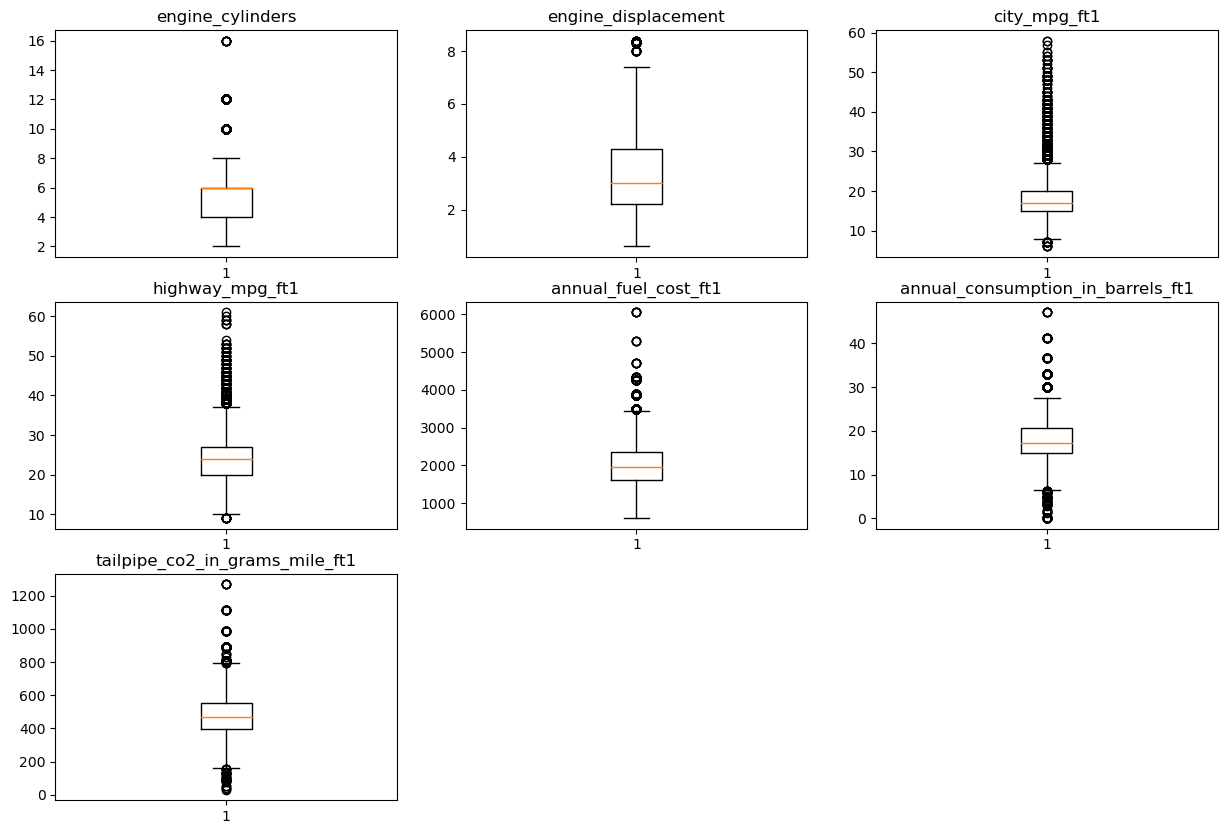

In [22]:
plt.subplots(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    plt.boxplot(raw_data[col], vert=True)
    plt.title(col)

#### Nhận xét:

Các cột có rất nhiều ouliner. Vì đây là bộ dữ liệu thực, nên ta không bỏ các outliner này

#### Sự phân bố của dữ liệu

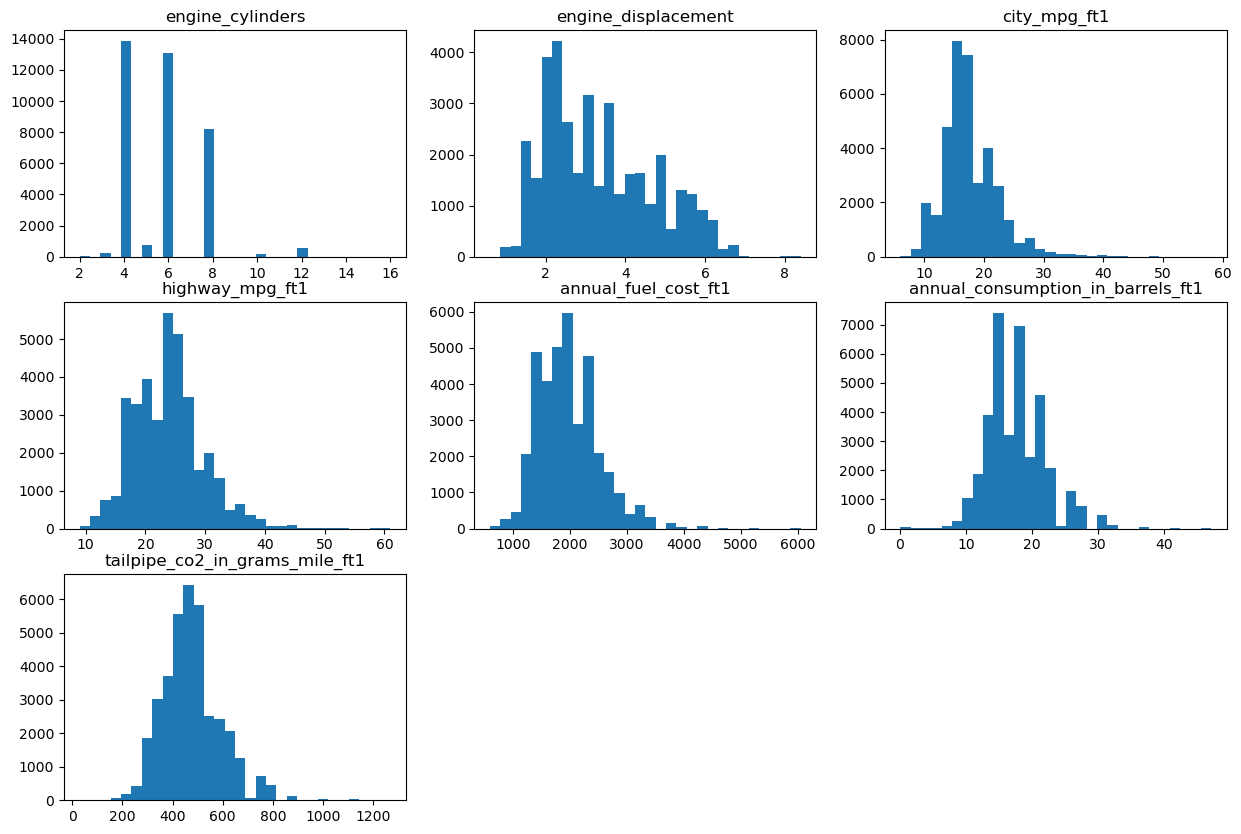

In [27]:
fig = plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    plt.hist(raw_data[col], bins=30)
    plt.title(col)

#### Vẽ heatmap để biểu diễn mối tương quan của các cột

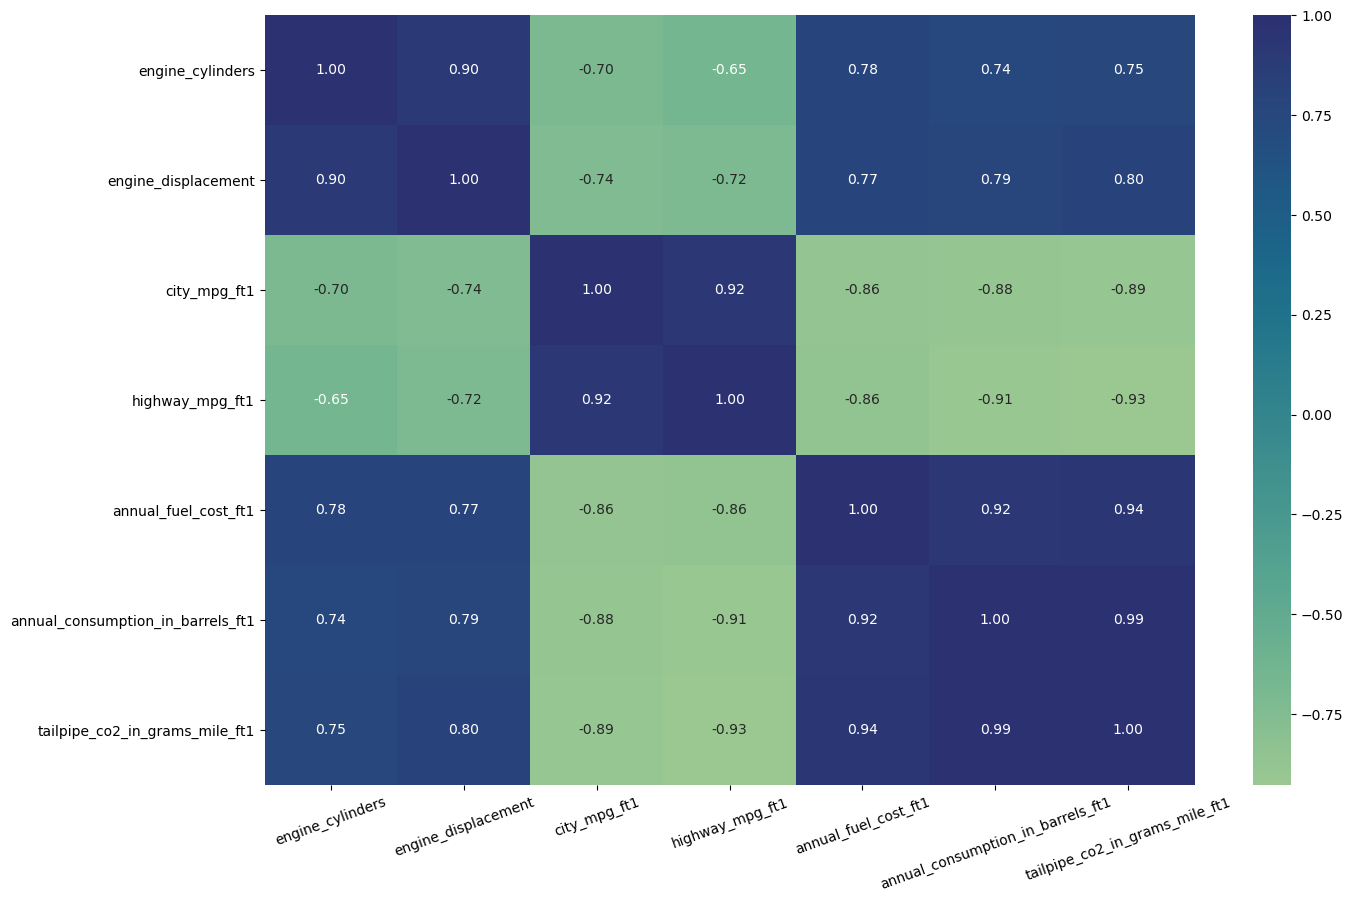

In [37]:
fig = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(raw_data[numerical_cols].corr(), annot=True, fmt=".2f", cmap='crest', center=0)
plt.xticks(rotation=20)
plt.show()

### Khám phá mối quan hệ trong dữ liệu

- Số lượng xe sản xuất theo từng năm
- Mức tiêu thụ tb theo từng năm


#### Số lượng xe sản xuất theo từng năm

<AxesSubplot:xlabel='year'>

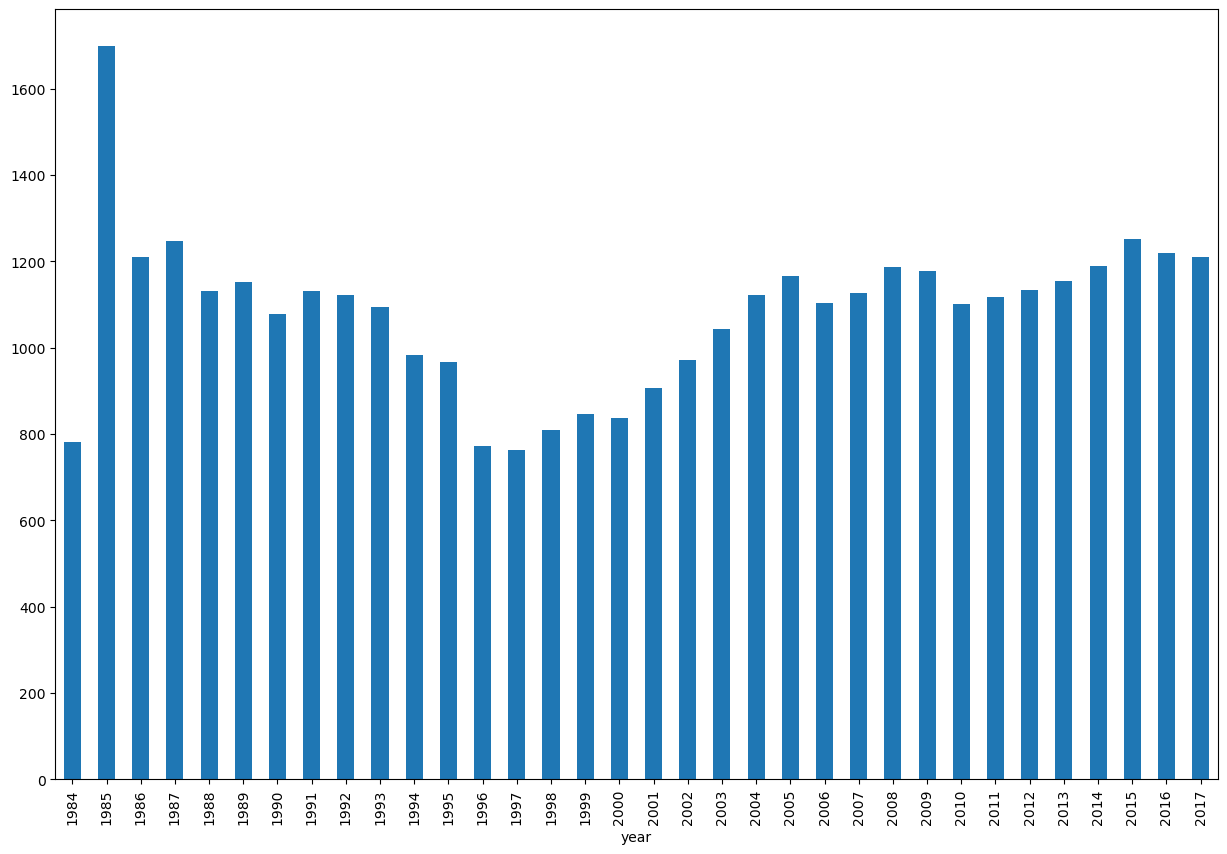

In [24]:
raw_data.groupby('year')['vehicle_id'].count().plot(kind='bar', figsize=(15, 10))

Nhận xét

#### Mức tiêu thụ nhiên liệu tb theo từng năm

<AxesSubplot:xlabel='year'>

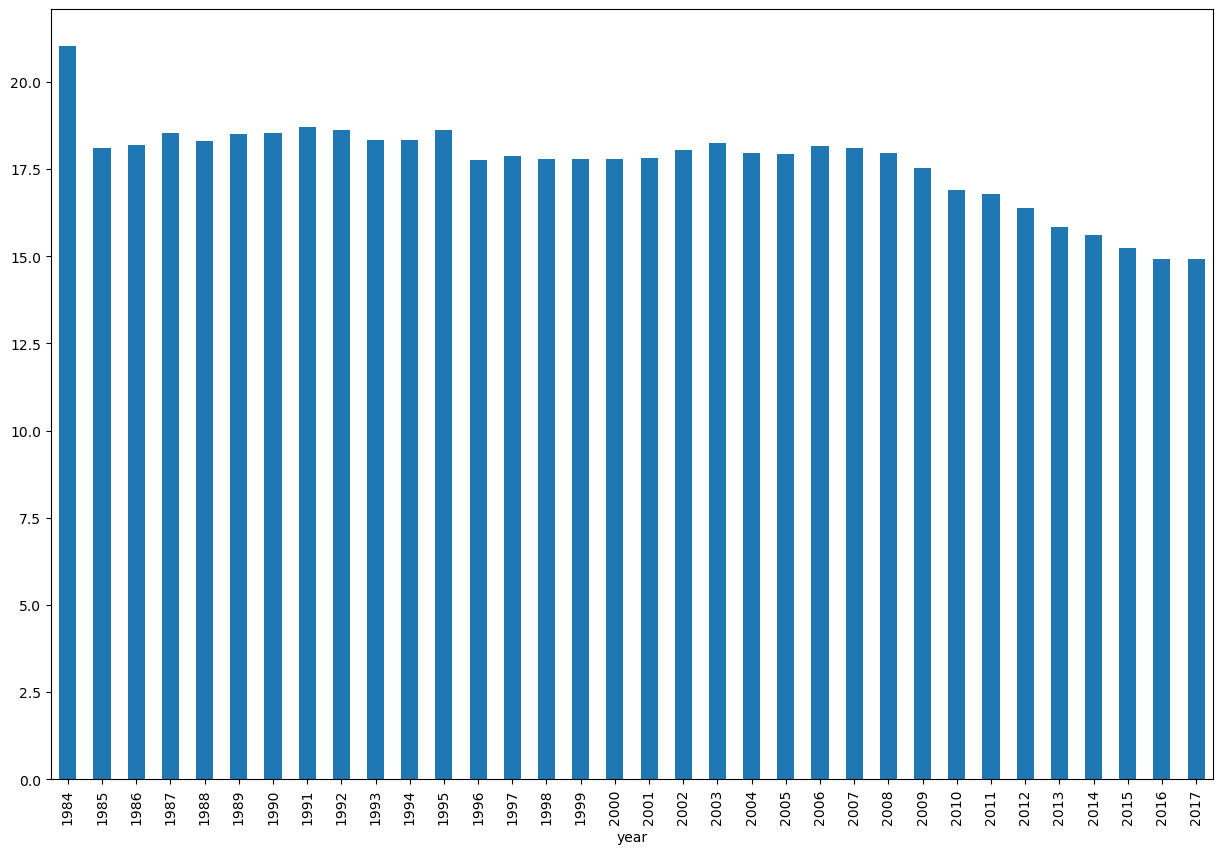

In [26]:
raw_data.groupby('year')['annual_consumption_in_barrels_ft1'].mean().plot(kind='bar', figsize=(15, 10))